In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data/creditcard.csv")
df.shape

(284807, 31)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The 'Class' will be our dependent variable.\
There are 30 features as independent features. Too many! So we need to find the most useful ones later.


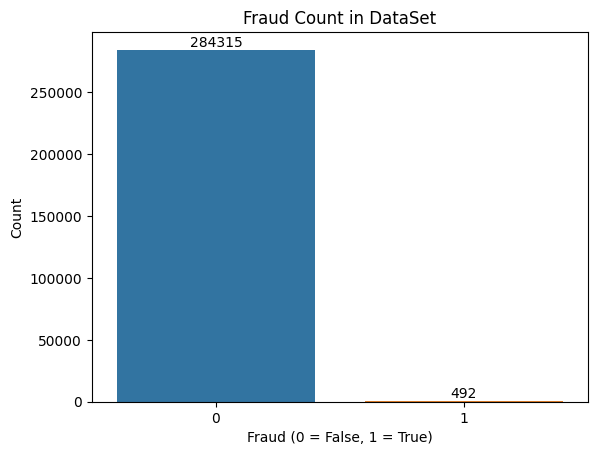

In [4]:
#https://stackoverflow.com/questions/55104819/display-count-on-top-of-seaborn-barplot
axes = sns.countplot(x=df['Class'], data=df)
axes.bar_label(axes.containers[0])
plt.title('Fraud Count in DataSet')
plt.xlabel('Fraud (0 = False, 1 = True)')
plt.ylabel('Count')
plt.show()

The dependent variable data is extremely unbalanced.

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There's no null value.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


We can see that 'Time' and 'Amount' have large numerical values.\
We need to scale the data.\
Normalization or standarization? Let's check the distribution.

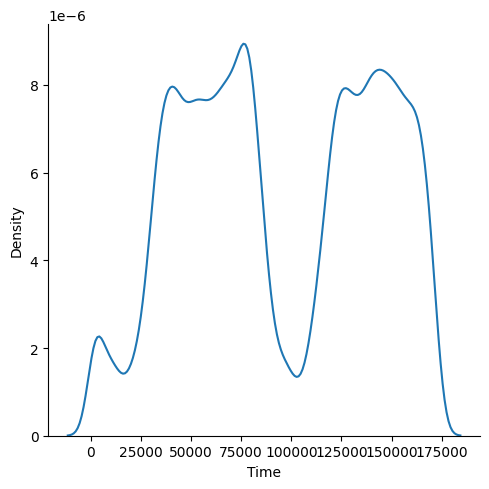

In [7]:
sns.displot(df, x='Time', kind='kde')

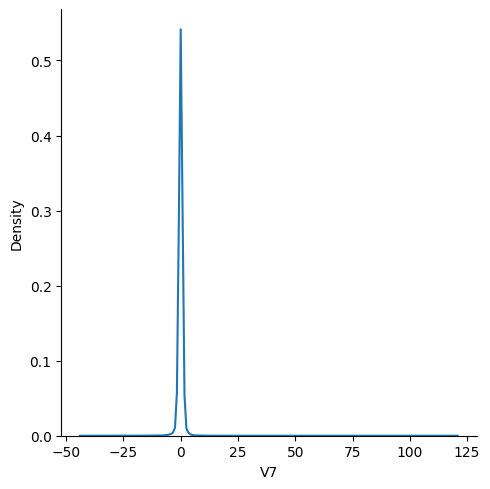

In [8]:
sns.displot(df, x='V7', kind='kde')

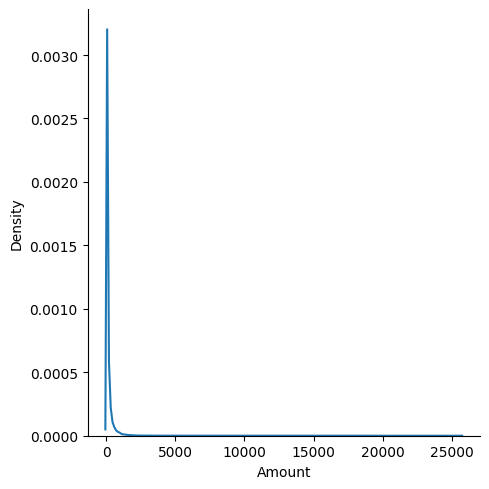

In [9]:
sns.displot(df, x='Amount', kind='kde')

They are not normally distributed. So we choose the normalize the data.

In [10]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop('Class', axis=1)
y = df['Class']
cols = list(df.columns)
cols.remove('Class')
scaler = MinMaxScaler()

#scale independent variables, and then concat dependent variable to restore dataframe
df = pd.DataFrame(scaler.fit_transform(X), columns = cols)
df = pd.concat([df, y], axis=1)

Since we have many features, we want to see how well these features help the model distinguish fraud and non-fraud.

C:\Users\业\AppData\Local\Temp\ipykernel_6656\1715563296.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


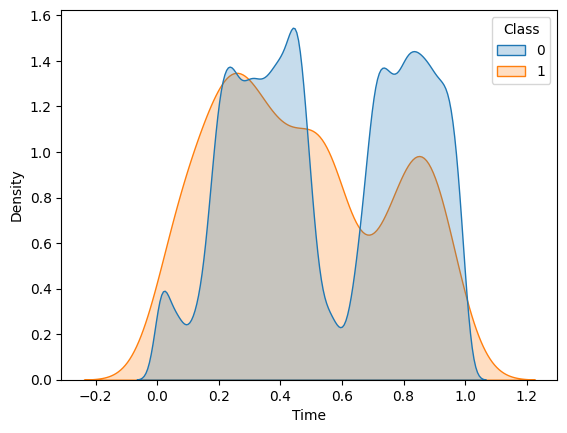

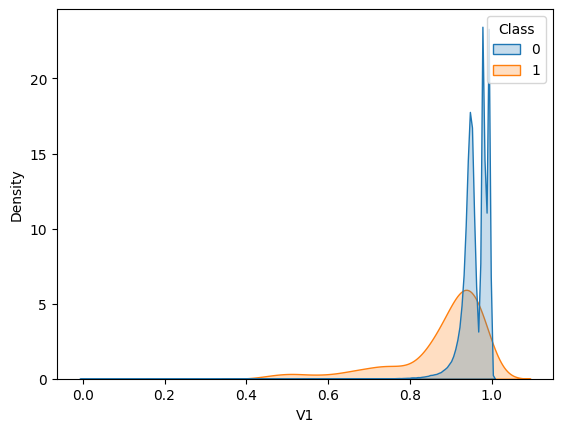

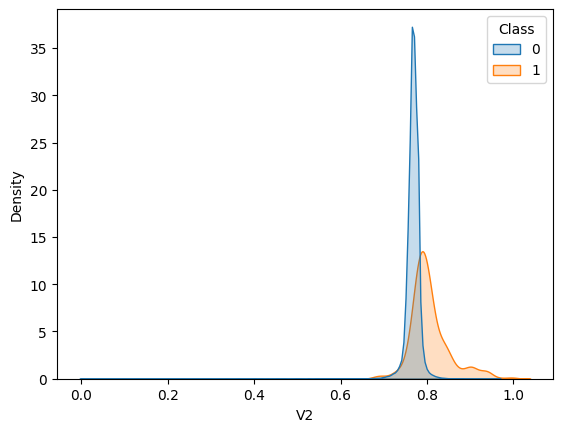

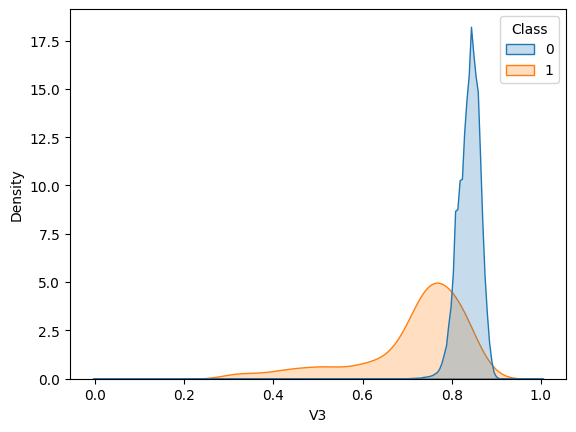

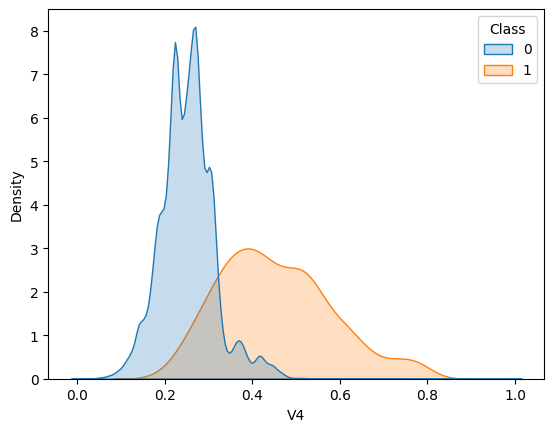

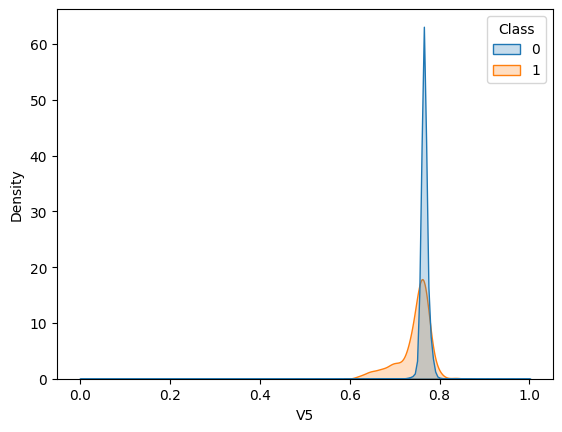

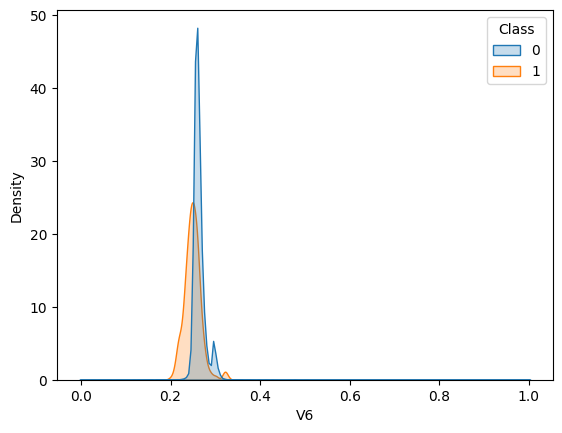

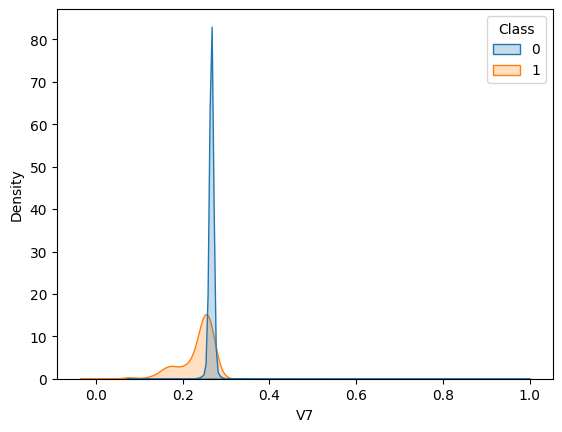

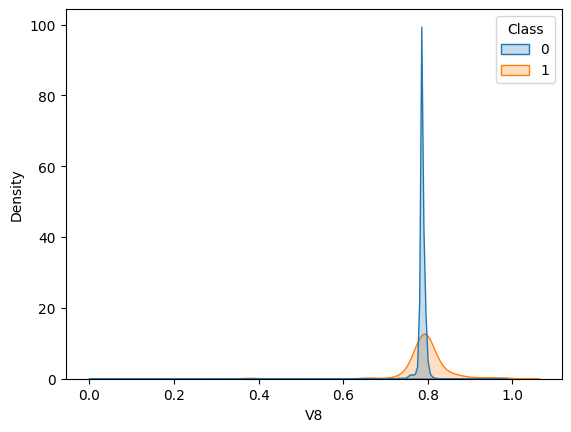

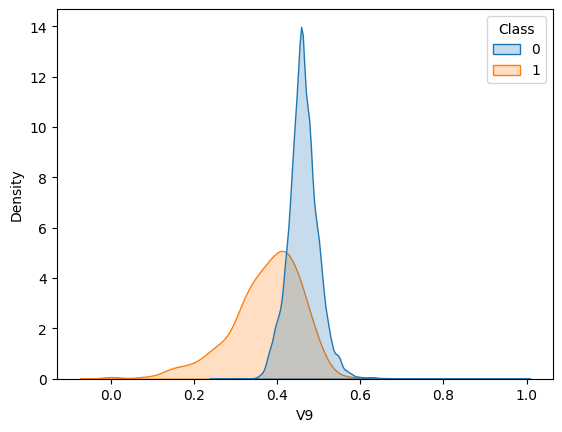

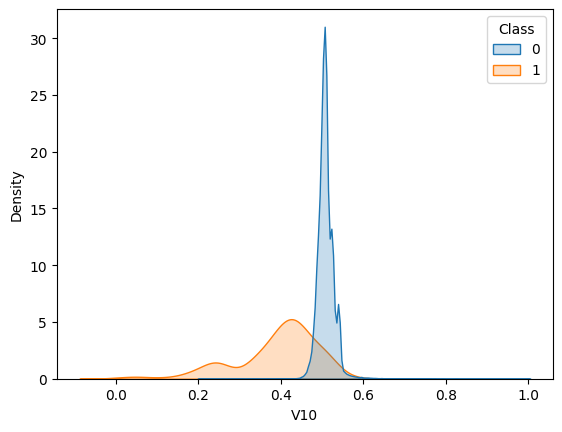

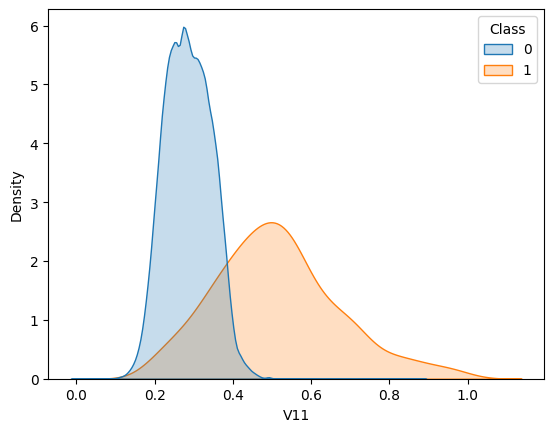

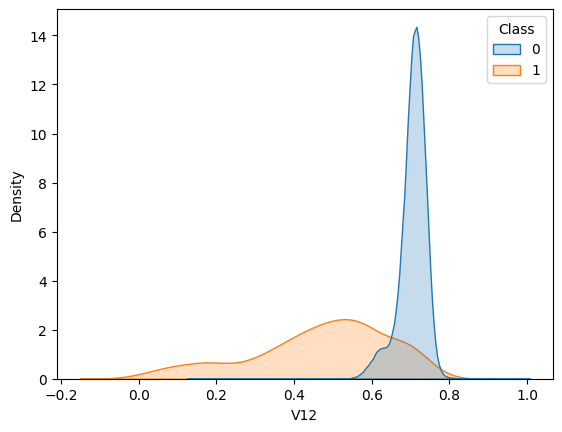

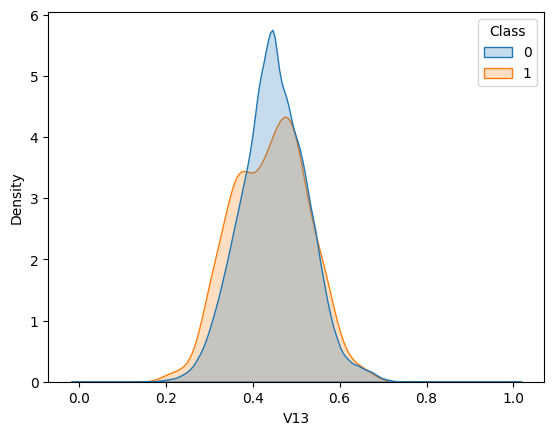

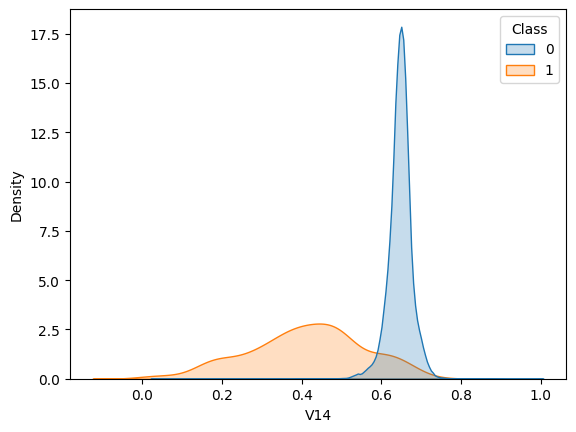

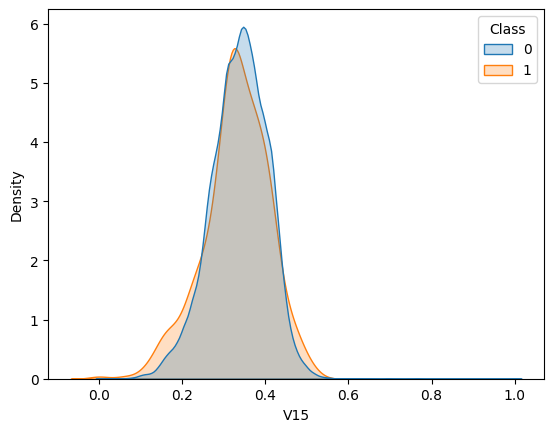

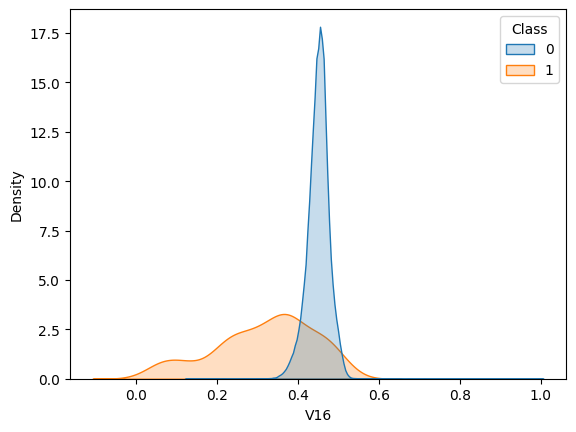

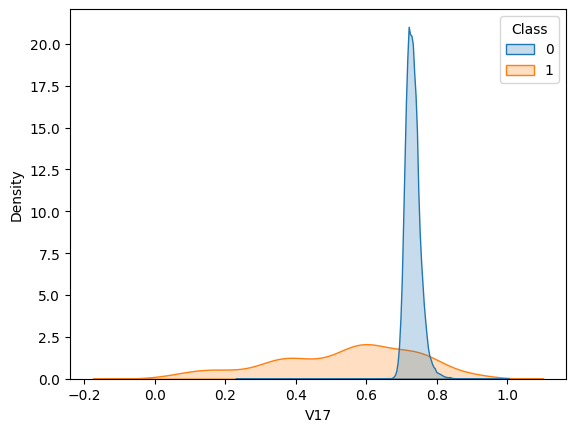

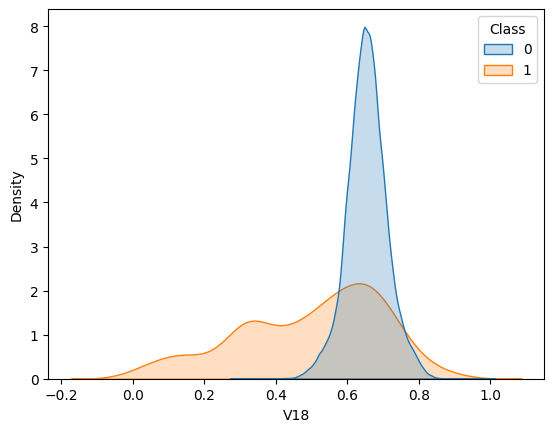

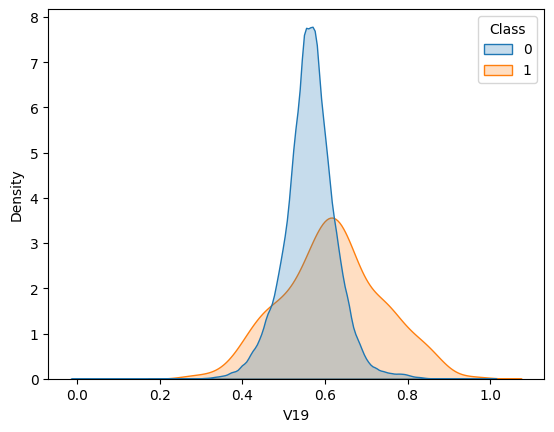

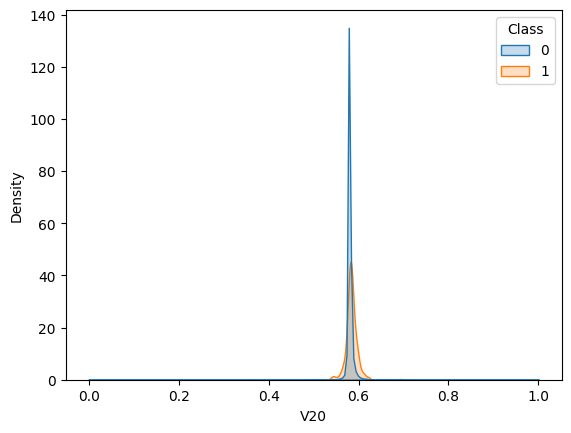

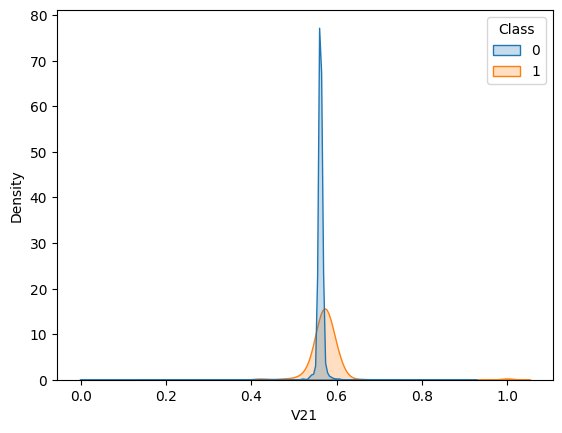

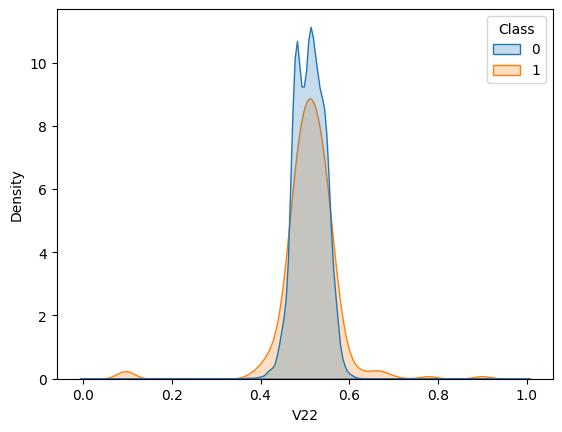

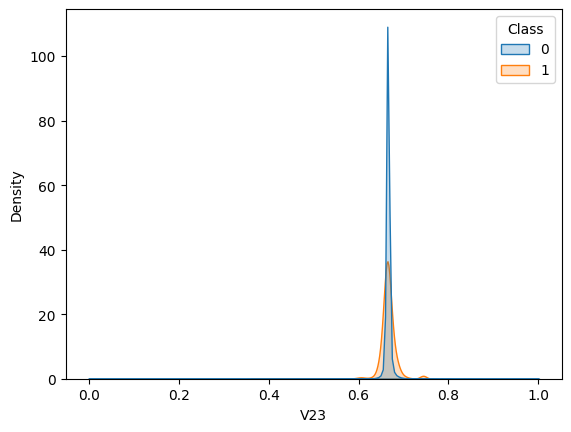

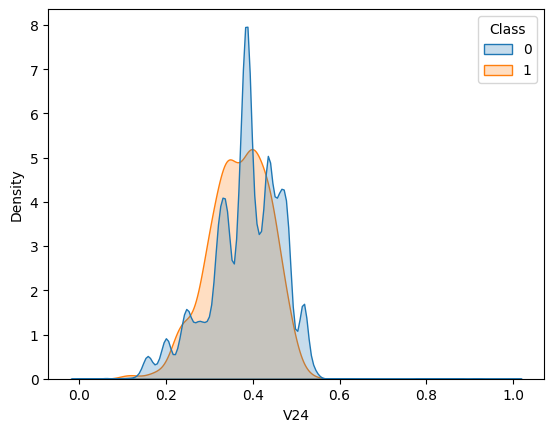

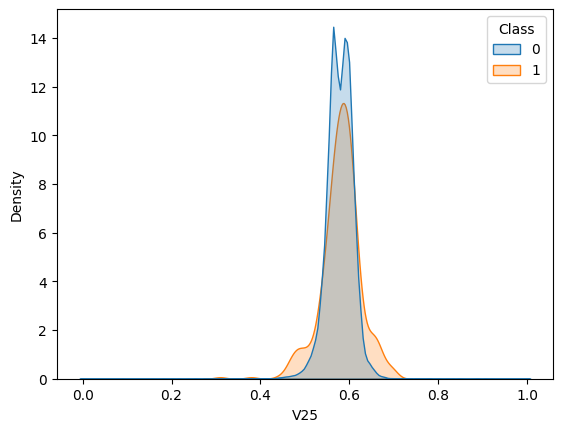

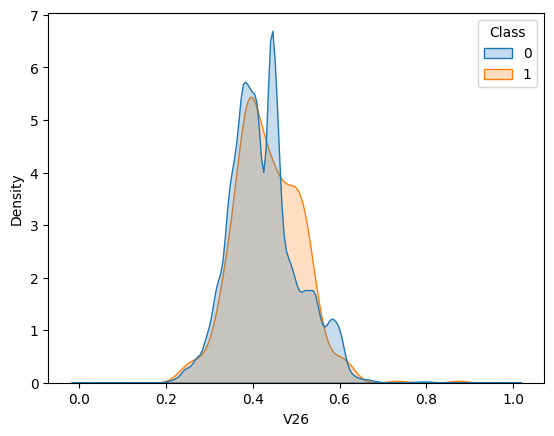

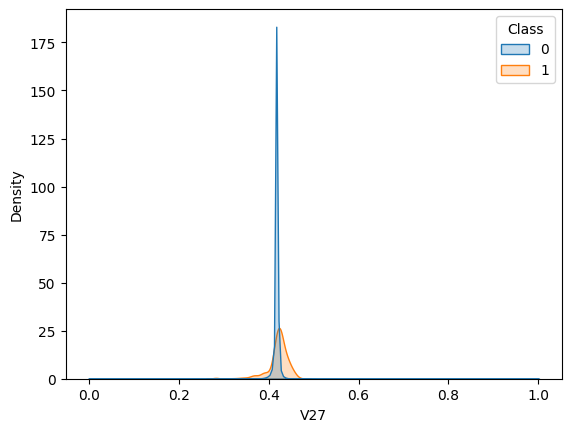

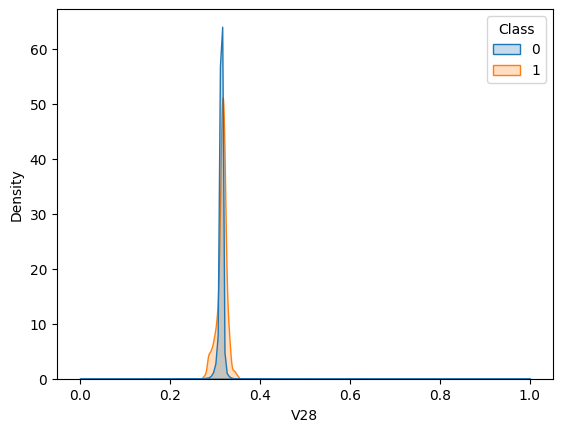

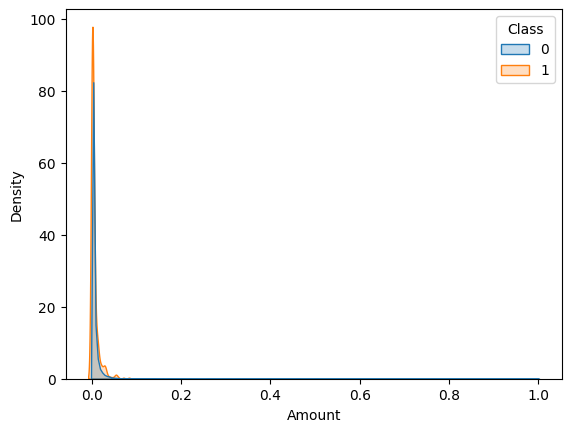

In [11]:
#https://seaborn.pydata.org/generated/seaborn.kdeplot.html
#https://stackoverflow.com/questions/69513501/seaborn-plot-displot-with-hue-and-dual-y-scale-twinx

features=list(df.columns)
features.remove('Class')
for i in range(len(features)):
    plt.figure()
    sns.kdeplot(data=df, x=f'{features[i]}', hue='Class',common_norm=False, fill=True)


#something about the warning: https://stackoverflow.com/questions/24500065/closing-matplotlib-figures

In [12]:
#soemthing about the warning
plt.close('all')

From the plots above, We can see each feature's distribution to fraud or not fraud. \
For plots of 'Time', 'V13', 'V15', 'V20', 'V22','V23','V24','V25','V26', 'V27','V28', and 'Amount', We can clearly see that those features can not seperates Class=1 and Class=0 well.

We can also use corelation matrix plot. But we have much more non-fraud data than fraud data. We perfrom undersample/oversample first.

In [13]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

RUS = RandomUnderSampler(random_state=21)
ROS = RandomOverSampler(random_state=42)

df_underSampled, y_underSampled = RUS.fit_resample(X=df, y=df['Class'])
df_overSampled, y_overSampled = ROS.fit_resample(X=df, y=df['Class'])



In [14]:
df_underSampled['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [15]:
df_overSampled['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

<AxesSubplot: >

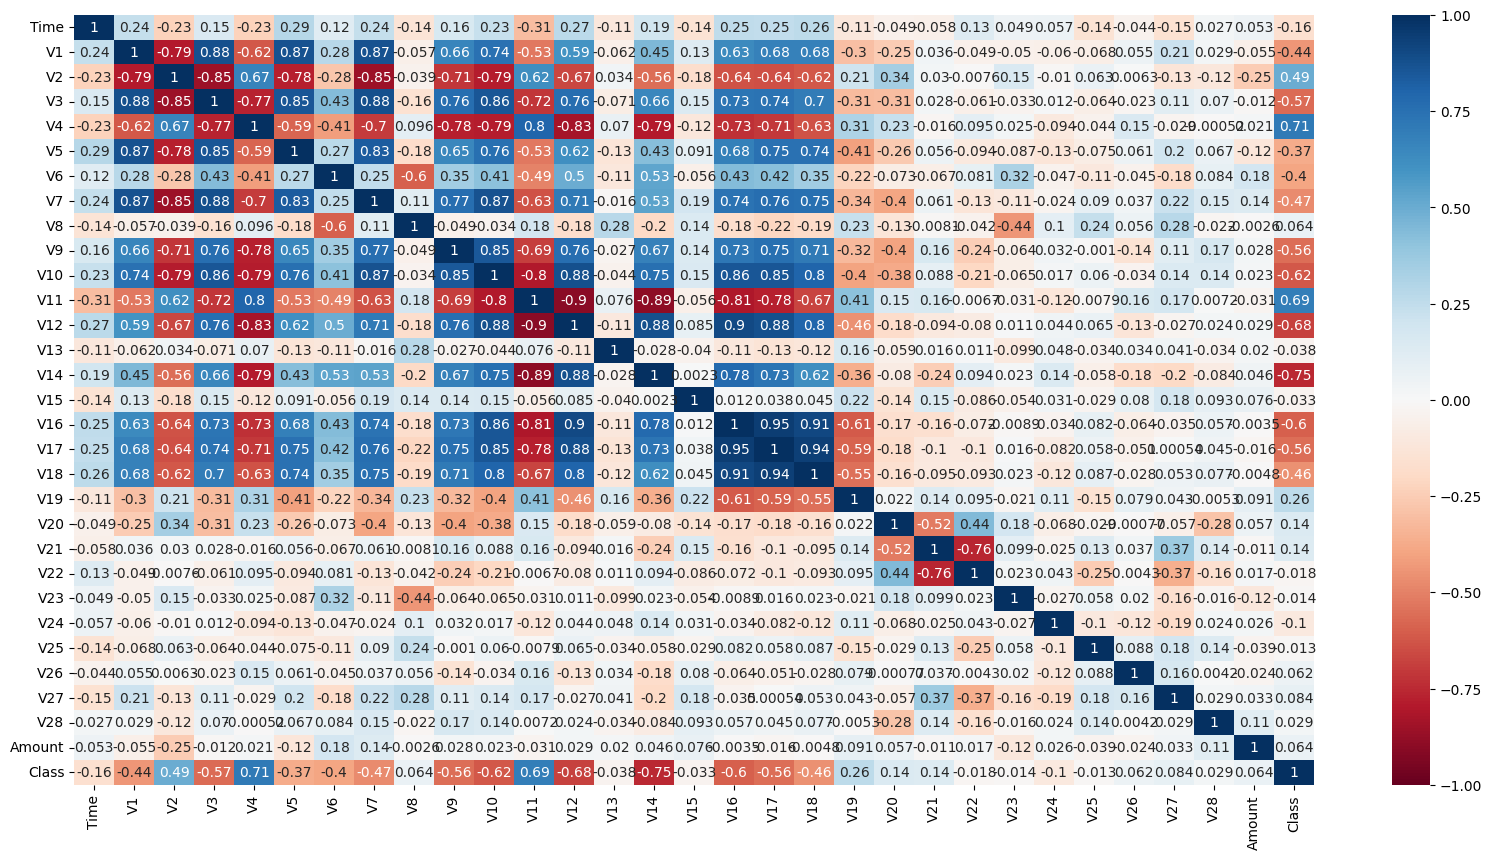

In [16]:
corr = df_underSampled.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

<AxesSubplot: >

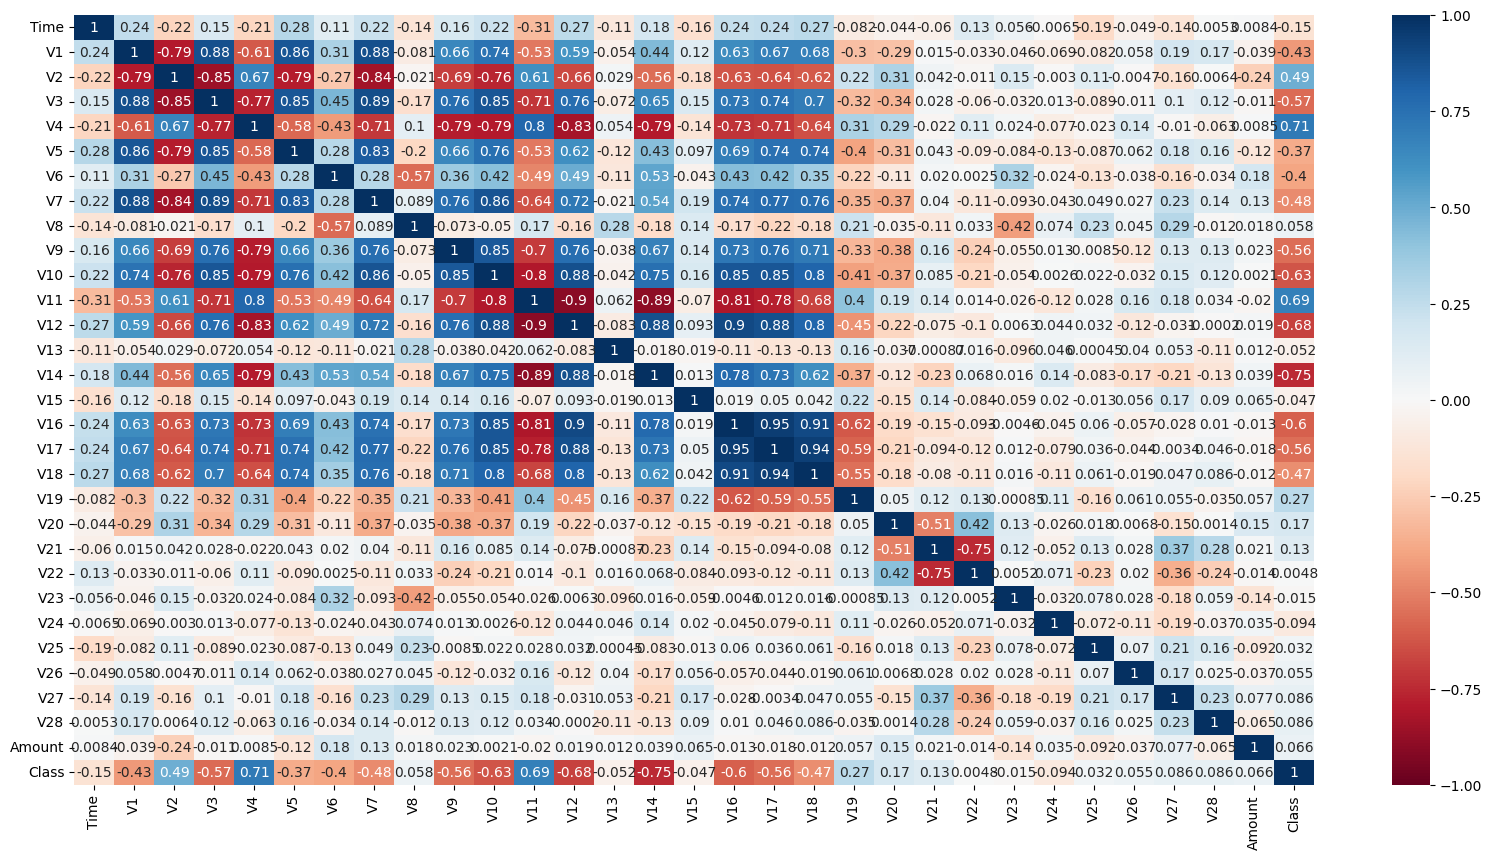

In [17]:
corr = df_overSampled.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

The correlation matrix plots above about undersampled dataframe and oversampled dataframe behave similarly\
we can see that, with respect to 'Class',\
the features that have the adequate postive linear relationship are: 'V2','V4','V11','V19','V20'\
the features that have the adequate negative linear relationship are: 'V1','V3','V5','V6','V7','V9','V10','V12','V14','V16','V17','V18'\
Remember that the kde plots show 'Time', 'V13', 'V15', 'V20', 'V22','V23','V24','V25','V26', 'V27','V28', and 'Amount' does not help our classification\
Therefore, we will choose drop 'Time', 'V13', 'V15', 'V22','V23','V24','V25','V26', 'V27','V28','Amount' + 'V8', 'V21'. 

In [18]:
df = df.drop(['Time', 'V13', 'V15', 'V22','V23','V24','V25','V26', 'V27','V28','Amount', 'V8', 'V21'], axis=1)

In [19]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = df.drop('Class', axis=1)
y = df['Class']

'''
Now we want to split the train and test sets. Remember that we have much more fraud data than non-fraud data. We choose to oversample the non-fraud data here. If we undersmaple, we will suffer the risk of losing important information since undersample means we only utilize 492 / 284315 = 0.17% of the non-fraud data. In addition, compared to the whole dataset, the minority class does not have sufficient size (492 out of 284807).\
Therefore, we will oversample. Specifically, we will use 'SMOTE' (which is mentioned in Discussion 7). "SMOTE makes for a higher recall of the minority class at the cost of lower precision." (https://towardsdatascience.com/smote-fdce2f605729) When it comes to credit card fraud, it is important to detect as many fraud cases as possible to protect people's properties. It is awful if our model indentifies a fraud case as a non-fraud case, and then people will lose money and they may need to contact the bank for further actions. On the other hand, it is less harmful for our model to identify a non-fraud case as a fraud case, which means people's credit card will get declined. It may be troublesome, but in real life, people have cash and most people with a credit card will have multiple credit cards. So recall is a good performance metric. 
(Agree? Disagree? Or maybe F1 score to balance recall and precision.)
'''

#we will oversample after train test split because we want to test the model on UNSEEN data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
smote = SMOTE(random_state=21)


In [20]:
X_train, y_train = smote.fit_resample(X, y)
